In [66]:
# Get the data
first_time = True
if first_time:
    dirs_to_remove = ['padded_images/', 'normalized_images/', 'gear_images/']
    for d in dirs_to_remove:
        try:
            shutil.rmtree(d)
        except:
            pass
    ! curl -O https://challenge.blob.core.windows.net/challengefiles/gear_images.zip
    import zipfile
    import shutil
    zip_ref = zipfile.ZipFile('gear_images.zip', 'r')
    zip_ref.extractall('gearimages')
    zip_ref.close()
    shutil.move('gearimages/gear_images', 'gear_images')
    shutil.rmtree('gearimages')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.4M  100 33.4M    0     0  15.8M      0  0:00:02  0:00:02 --:--:-- 15.8M


## Challenge 2

In [67]:
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
import os
from PIL import Image, ImageOps
# Import the matplotlib libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as im
import numpy as np
from PIL import Image

In [68]:
images_path = 'gear_images/'
padded_images_dir = 'padded_images/'
normalized_images_dir = 'normalized_images/'

In [69]:
def pad_and_resize(im_pth, desired_size):
    im = cv2.imread(im_pth)
    old_size = im.shape[:2] # old_size is in (height, width) format
    print(old_size)

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [255, 255, 255]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    print(im_pth)
    cv2.imwrite(im_pth, new_im)
    return new_im

def linear_norm(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

def normalize(filename):
    print(filename)
    subdir = filename.split("/")[-2]
    name = filename.split("/")[-1]
    img = Image.open(filename).convert('RGB')
    arr = np.array(img)
    new_img = Image.fromarray(linear_norm(arr).astype('uint8'),'RGB')
    if not os.path.exists(normalized_images_dir + subdir):
        os.makedirs(normalized_images_dir + subdir)
    new_img.save(normalized_images_dir + subdir + '/' + name)

In [70]:
subdirectories = [x[0] for x in os.walk(images_path) \
               if '.ipynb_checkpoints' not in x[0] and x[0] != 'gear_images/']


for sub in subdirectories:
    files = [sub + '/' + f for f in listdir(sub) if isfile(join(sub, f))]
    for f in files:
        pad_and_resize(f, 128)
        normalize(f)

(436, 436)
gear_images/boots/51fxSrdRH3L._AC_US436_QL65_.jpg
gear_images/boots/51fxSrdRH3L._AC_US436_QL65_.jpg
(380, 400)
gear_images/boots/10211759x1104651_zm.jpeg
gear_images/boots/10211759x1104651_zm.jpeg
(436, 436)
gear_images/boots/51hAX8xT6bL._AC_US436_QL65_.jpg
gear_images/boots/51hAX8xT6bL._AC_US436_QL65_.jpg
(220, 230)
gear_images/boots/896260.jpeg
gear_images/boots/896260.jpeg
(400, 400)
gear_images/boots/10018755x1036824_zm.jpeg
gear_images/boots/10018755x1036824_zm.jpeg
(400, 340)
gear_images/boots/10305295x1039826_zm.jpeg
gear_images/boots/10305295x1039826_zm.jpeg
(436, 436)
gear_images/boots/51QgEWGyZ-L._AC_US436_QL65_.jpg
gear_images/boots/51QgEWGyZ-L._AC_US436_QL65_.jpg
(436, 436)
gear_images/boots/51YZs+KEHML._AC_US436_QL65_.jpg
gear_images/boots/51YZs+KEHML._AC_US436_QL65_.jpg
(436, 436)
gear_images/boots/51yQeovtEdL._AC_US436_QL65_.jpg
gear_images/boots/51yQeovtEdL._AC_US436_QL65_.jpg
(400, 400)
gear_images/boots/10305296x1039826_zm.jpeg
gear_images/boots/10305296x10

(436, 436)
gear_images/boots/41pNuZSfz+L._AC_US436_QL65_.jpg
gear_images/boots/41pNuZSfz+L._AC_US436_QL65_.jpg
(436, 436)
gear_images/boots/51t-mAcoA0L._AC_US436_QL65_.jpg
gear_images/boots/51t-mAcoA0L._AC_US436_QL65_.jpg
(400, 260)
gear_images/gloves/10230884x1062486_zm.jpeg
gear_images/gloves/10230884x1062486_zm.jpeg
(260, 260)
gear_images/gloves/2433390681_145351_png_overview_5.png
gear_images/gloves/2433390681_145351_png_overview_5.png
(260, 244)
gear_images/gloves/2448840380_182219_jpg_overview_3.png
gear_images/gloves/2448840380_182219_jpg_overview_3.png
(260, 260)
gear_images/gloves/2448810639_197194_png_overview_6.png
gear_images/gloves/2448810639_197194_png_overview_6.png
(260, 260)
gear_images/gloves/2448851159_197198_png_overview_6.png
gear_images/gloves/2448851159_197198_png_overview_6.png
(400, 387)
gear_images/gloves/10223894x1016653_zm.jpeg
gear_images/gloves/10223894x1016653_zm.jpeg
(320, 320)
gear_images/gloves/51Cm7soCBaL._AC_US320_QL65_.jpg
gear_images/gloves/51Cm7so

gear_images/gloves/2432670001_145325_png_overview_7.png
(400, 222)
gear_images/gloves/10374257x1012905_zm.jpeg
gear_images/gloves/10374257x1012905_zm.jpeg
(320, 320)
gear_images/gloves/41fZ+CdkYYL._AC_US320_QL65_.jpg
gear_images/gloves/41fZ+CdkYYL._AC_US320_QL65_.jpg
(400, 396)
gear_images/gloves/10282924x1012905_zm.jpeg
gear_images/gloves/10282924x1012905_zm.jpeg
(400, 400)
gear_images/gloves/10353141x1012905_zm.jpeg
gear_images/gloves/10353141x1012905_zm.jpeg
(400, 337)
gear_images/gloves/10344058x1149966_zm.jpeg
gear_images/gloves/10344058x1149966_zm.jpeg
(397, 400)
gear_images/gloves/10088039x1012905_zm.jpeg
gear_images/gloves/10088039x1012905_zm.jpeg
(400, 400)
gear_images/gloves/10374249x1012905_zm.jpeg
gear_images/gloves/10374249x1012905_zm.jpeg
(400, 367)
gear_images/gloves/10315544x1130062_zm.jpeg
gear_images/gloves/10315544x1130062_zm.jpeg
(260, 260)
gear_images/gloves/2448830621_185889_png_overview_4.png
gear_images/gloves/2448830621_185889_png_overview_4.png
(400, 287)
gear

(400, 400)
gear_images/gloves/10230858x1029166_zm.jpeg
gear_images/gloves/10230858x1029166_zm.jpeg
(358, 400)
gear_images/gloves/10344057x1149992_zm.jpeg
gear_images/gloves/10344057x1149992_zm.jpeg
(400, 340)
gear_images/gloves/10344776x1050984_zm.jpeg
gear_images/gloves/10344776x1050984_zm.jpeg
(400, 204)
gear_images/gloves/10290774x1012905_zm.jpeg
gear_images/gloves/10290774x1012905_zm.jpeg
(260, 260)
gear_images/gloves/2433460001_145348_png_overview_6.png
gear_images/gloves/2433460001_145348_png_overview_6.png
(260, 260)
gear_images/gloves/2432450001_145311_png_overview_6.png
gear_images/gloves/2432450001_145311_png_overview_6.png
(230, 194)
gear_images/gloves/120847.png
gear_images/gloves/120847.png
(400, 400)
gear_images/gloves/10230884x1078391_zm.jpeg
gear_images/gloves/10230884x1078391_zm.jpeg
(400, 269)
gear_images/gloves/10342584x1013433_zm.jpeg
gear_images/gloves/10342584x1013433_zm.jpeg
(400, 265)
gear_images/pulleys/10308589_zm.jpeg
gear_images/pulleys/10308589_zm.jpeg
(400

(195, 195)
gear_images/carabiners/2007277_701_main.jpg
gear_images/carabiners/2007277_701_main.jpg
(360, 400)
gear_images/carabiners/10364090x1010913_zm.jpeg
gear_images/carabiners/10364090x1010913_zm.jpeg
(230, 193)
gear_images/carabiners/125471.jpeg
gear_images/carabiners/125471.jpeg
(360, 400)
gear_images/carabiners/10364089_zm.jpeg
gear_images/carabiners/10364089_zm.jpeg
(400, 355)
gear_images/carabiners/10329827x1013583_zm.jpeg
gear_images/carabiners/10329827x1013583_zm.jpeg
(400, 400)
gear_images/carabiners/10019223_zm.jpeg
gear_images/carabiners/10019223_zm.jpeg
(230, 142)
gear_images/carabiners/113465.jpeg
gear_images/carabiners/113465.jpeg
(400, 223)
gear_images/carabiners/10337571_zm.jpeg
gear_images/carabiners/10337571_zm.jpeg
(400, 274)
gear_images/carabiners/10301692_zm.jpeg
gear_images/carabiners/10301692_zm.jpeg
(400, 400)
gear_images/carabiners/10019210x1014941_zm.jpeg
gear_images/carabiners/10019210x1014941_zm.jpeg
(400, 400)
gear_images/carabiners/10210811x1012905_zm.

(400, 400)
gear_images/carabiners/10244331x1012549_zm.jpeg
gear_images/carabiners/10244331x1012549_zm.jpeg
(400, 243)
gear_images/carabiners/10331833x1012163_zm.jpeg
gear_images/carabiners/10331833x1012163_zm.jpeg
(400, 270)
gear_images/carabiners/10338932_zm.jpeg
gear_images/carabiners/10338932_zm.jpeg
(400, 228)
gear_images/carabiners/10338928_zm.jpeg
gear_images/carabiners/10338928_zm.jpeg
(436, 436)
gear_images/carabiners/41eT8oYAJpL._AC_US436_QL65_.jpg
gear_images/carabiners/41eT8oYAJpL._AC_US436_QL65_.jpg
(436, 436)
gear_images/carabiners/41abTPzkt8L._AC_US436_QL65_.jpg
gear_images/carabiners/41abTPzkt8L._AC_US436_QL65_.jpg
(360, 400)
gear_images/carabiners/10301635x1049516_zm.jpeg
gear_images/carabiners/10301635x1049516_zm.jpeg
(400, 229)
gear_images/carabiners/10353615x1012163_zm.jpeg
gear_images/carabiners/10353615x1012163_zm.jpeg
(400, 334)
gear_images/carabiners/10273592x1036829_zm.jpeg
gear_images/carabiners/10273592x1036829_zm.jpeg
(400, 400)
gear_images/carabiners/1009426

(195, 195)
gear_images/helmets/2039689_101_main.jpg
gear_images/helmets/2039689_101_main.jpg
(400, 335)
gear_images/helmets/10311543x1010868_zm.jpeg
gear_images/helmets/10311543x1010868_zm.jpeg
(400, 400)
gear_images/helmets/PMMPIHOEHODFMANJx1038115_zm.jpeg
gear_images/helmets/PMMPIHOEHODFMANJx1038115_zm.jpeg
(400, 313)
gear_images/helmets/10337586x1012549_zm.jpeg
gear_images/helmets/10337586x1012549_zm.jpeg
(400, 318)
gear_images/helmets/10311144x1013039_zm.jpeg
gear_images/helmets/10311144x1013039_zm.jpeg
(400, 328)
gear_images/helmets/10187948x1078795_zm.jpeg
gear_images/helmets/10187948x1078795_zm.jpeg
(400, 400)
gear_images/helmets/10311154x1011898_zm.jpeg
gear_images/helmets/10311154x1011898_zm.jpeg
(398, 400)
gear_images/helmets/10093454x1042156_zm.jpeg
gear_images/helmets/10093454x1042156_zm.jpeg
(400, 400)
gear_images/helmets/10188393x1043709_zm.jpeg
gear_images/helmets/10188393x1043709_zm.jpeg
(386, 400)
gear_images/helmets/10311543x1128005_zm.jpeg
gear_images/helmets/1031154

(221, 230)
gear_images/harnesses/868199.jpeg
gear_images/harnesses/868199.jpeg
(436, 436)
gear_images/harnesses/51yrA4d+N0L._AC_US436_QL65_.jpg
gear_images/harnesses/51yrA4d+N0L._AC_US436_QL65_.jpg
(323, 400)
gear_images/harnesses/10329907x1041642_zm.jpeg
gear_images/harnesses/10329907x1041642_zm.jpeg
(397, 400)
gear_images/harnesses/10286265x1042156_zm.jpeg
gear_images/harnesses/10286265x1042156_zm.jpeg
(400, 360)
gear_images/harnesses/10373976_zm.jpeg
gear_images/harnesses/10373976_zm.jpeg
(400, 351)
gear_images/harnesses/10374002_zm.jpeg
gear_images/harnesses/10374002_zm.jpeg
(400, 400)
gear_images/harnesses/10018255x1043343_zm.jpeg
gear_images/harnesses/10018255x1043343_zm.jpeg
(400, 396)
gear_images/harnesses/10308564_zm.jpeg
gear_images/harnesses/10308564_zm.jpeg
(363, 400)
gear_images/harnesses/10311158x1013457_zm.jpeg
gear_images/harnesses/10311158x1013457_zm.jpeg
(400, 349)
gear_images/harnesses/10373988_zm.jpeg
gear_images/harnesses/10373988_zm.jpeg
(355, 400)
gear_images/har

(400, 317)
gear_images/insulated_jackets/10344852x1150780_zm.jpeg
gear_images/insulated_jackets/10344852x1150780_zm.jpeg
(195, 195)
gear_images/insulated_jackets/2041239_001_main.jpg
gear_images/insulated_jackets/2041239_001_main.jpg
(400, 355)
gear_images/insulated_jackets/10281836x1012905_zm.jpeg
gear_images/insulated_jackets/10281836x1012905_zm.jpeg
(400, 309)
gear_images/insulated_jackets/10344853x1050984_zm.jpeg
gear_images/insulated_jackets/10344853x1050984_zm.jpeg
(400, 319)
gear_images/insulated_jackets/10312818x1149711_zm.jpeg
gear_images/insulated_jackets/10312818x1149711_zm.jpeg
(230, 154)
gear_images/insulated_jackets/117956.jpeg
gear_images/insulated_jackets/117956.jpeg
(400, 230)
gear_images/insulated_jackets/10167913x1063714_zm.jpeg
gear_images/insulated_jackets/10167913x1063714_zm.jpeg
(400, 348)
gear_images/insulated_jackets/10281638x1011016_zm.jpeg
gear_images/insulated_jackets/10281638x1011016_zm.jpeg
(400, 321)
gear_images/insulated_jackets/10312819x1149856_zm.jpeg


(400, 282)
gear_images/insulated_jackets/10317138x1058135_zm.jpeg
gear_images/insulated_jackets/10317138x1058135_zm.jpeg
(400, 400)
gear_images/insulated_jackets/10223783x1086840_zm.jpeg
gear_images/insulated_jackets/10223783x1086840_zm.jpeg
(400, 254)
gear_images/insulated_jackets/10254529x1063556_zm.jpeg
gear_images/insulated_jackets/10254529x1063556_zm.jpeg
(400, 310)
gear_images/insulated_jackets/10344853x1057721_zm.jpeg
gear_images/insulated_jackets/10344853x1057721_zm.jpeg
(400, 332)
gear_images/insulated_jackets/10343658x1012905_zm.jpeg
gear_images/insulated_jackets/10343658x1012905_zm.jpeg
(400, 304)
gear_images/insulated_jackets/10342601x1012905_zm.jpeg
gear_images/insulated_jackets/10342601x1012905_zm.jpeg
(400, 228)
gear_images/insulated_jackets/10167913x1116127_zm.jpeg
gear_images/insulated_jackets/10167913x1116127_zm.jpeg
(400, 373)
gear_images/insulated_jackets/10252805x1072372_zm.jpeg
gear_images/insulated_jackets/10252805x1072372_zm.jpeg
(400, 342)
gear_images/insulated

gear_images/crampons/897732.jpeg
(436, 436)
gear_images/crampons/41WsN-ZX2+L._AC_US436_QL65_.jpg
gear_images/crampons/41WsN-ZX2+L._AC_US436_QL65_.jpg
(436, 436)
gear_images/crampons/51XjPDEkANL._AC_US436_QL65_.jpg
gear_images/crampons/51XjPDEkANL._AC_US436_QL65_.jpg
(400, 400)
gear_images/crampons/10215214x1003635_zm.jpeg
gear_images/crampons/10215214x1003635_zm.jpeg
(400, 400)
gear_images/crampons/10090550x1024698_zm.jpeg
gear_images/crampons/10090550x1024698_zm.jpeg
(260, 400)
gear_images/crampons/10260977x1012549_zm.jpeg
gear_images/crampons/10260977x1012549_zm.jpeg
(195, 195)
gear_images/crampons/2022017_004_main.jpg
gear_images/crampons/2022017_004_main.jpg
(396, 400)
gear_images/crampons/10285550x1024698_zm.jpeg
gear_images/crampons/10285550x1024698_zm.jpeg
(400, 400)
gear_images/crampons/10215231x1075126_zm.jpeg
gear_images/crampons/10215231x1075126_zm.jpeg
(195, 195)
gear_images/crampons/2022023_701_main.jpg
gear_images/crampons/2022023_701_main.jpg
(278, 400)
gear_images/cramp

(400, 385)
gear_images/rope/10290966x1005685_zm.jpeg
gear_images/rope/10290966x1005685_zm.jpeg
(400, 160)
gear_images/rope/10277183x1106581_zm.jpeg
gear_images/rope/10277183x1106581_zm.jpeg
(270, 400)
gear_images/rope/10337623x1107706_zm.jpeg
gear_images/rope/10337623x1107706_zm.jpeg
(400, 141)
gear_images/rope/10331758x1141978_zm.jpeg
gear_images/rope/10331758x1141978_zm.jpeg
(230, 82)
gear_images/rope/105960.jpeg
gear_images/rope/105960.jpeg
(400, 400)
gear_images/rope/10253713x1036971_zm.jpeg
gear_images/rope/10253713x1036971_zm.jpeg
(195, 195)
gear_images/rope/2039685_701_main.jpg
gear_images/rope/2039685_701_main.jpg
(230, 71)
gear_images/rope/114546.jpeg
gear_images/rope/114546.jpeg
(400, 400)
gear_images/rope/10253727x1013041_zm.jpeg
gear_images/rope/10253727x1013041_zm.jpeg
(400, 113)
gear_images/rope/10215514x1011102_zm.jpeg
gear_images/rope/10215514x1011102_zm.jpeg
(282, 400)
gear_images/rope/10337628x1145760_zm.jpeg
gear_images/rope/10337628x1145760_zm.jpeg
(162, 230)
gear_i

(400, 400)
gear_images/rope/10253749x1003070_zm.jpeg
gear_images/rope/10253749x1003070_zm.jpeg
(195, 195)
gear_images/rope/2039684_408_main.jpg
gear_images/rope/2039684_408_main.jpg
(400, 400)
gear_images/rope/10253708x1011898_zm.jpeg
gear_images/rope/10253708x1011898_zm.jpeg
(400, 359)
gear_images/rope/10373950x1012549_zm.jpeg
gear_images/rope/10373950x1012549_zm.jpeg
(400, 182)
gear_images/rope/10290359x1106579_zm.jpeg
gear_images/rope/10290359x1106579_zm.jpeg
(400, 400)
gear_images/rope/10277185x1106581_zm.jpeg
gear_images/rope/10277185x1106581_zm.jpeg
(400, 400)
gear_images/rope/10290364x1052986_zm.jpeg
gear_images/rope/10290364x1052986_zm.jpeg
(400, 357)
gear_images/rope/10374042_zm.jpeg
gear_images/rope/10374042_zm.jpeg
(322, 400)
gear_images/rope/10373969x1012138_zm.jpeg
gear_images/rope/10373969x1012138_zm.jpeg
(400, 398)
gear_images/rope/10374066x1012138_zm.jpeg
gear_images/rope/10374066x1012138_zm.jpeg
(400, 400)
gear_images/rope/10277186x1106723_zm.jpeg
gear_images/rope/1027

(400, 315)
gear_images/hardshell_jackets/10359422x1112774_zm.jpeg
gear_images/hardshell_jackets/10359422x1112774_zm.jpeg
(400, 325)
gear_images/hardshell_jackets/10300517x1108394_zm.jpeg
gear_images/hardshell_jackets/10300517x1108394_zm.jpeg
(400, 293)
gear_images/hardshell_jackets/10349749x1046309_zm.jpeg
gear_images/hardshell_jackets/10349749x1046309_zm.jpeg
(400, 188)
gear_images/hardshell_jackets/10330048x1011645_zm.jpeg
gear_images/hardshell_jackets/10330048x1011645_zm.jpeg
(400, 302)
gear_images/hardshell_jackets/10329963x1012905_zm.jpeg
gear_images/hardshell_jackets/10329963x1012905_zm.jpeg
(230, 146)
gear_images/hardshell_jackets/118016.jpeg
gear_images/hardshell_jackets/118016.jpeg
(400, 242)
gear_images/hardshell_jackets/10342599x1014140_zm.jpeg
gear_images/hardshell_jackets/10342599x1014140_zm.jpeg
(230, 194)
gear_images/hardshell_jackets/112030.jpeg
gear_images/hardshell_jackets/112030.jpeg
(400, 273)
gear_images/hardshell_jackets/10280785x1141723_zm.jpeg
gear_images/hardsh

(400, 315)
gear_images/hardshell_jackets/10304249x1016191_zm.jpeg
gear_images/hardshell_jackets/10304249x1016191_zm.jpeg
(400, 307)
gear_images/hardshell_jackets/10291507x1039132_zm.jpeg
gear_images/hardshell_jackets/10291507x1039132_zm.jpeg
(400, 309)
gear_images/hardshell_jackets/10329964x1012905_zm.jpeg
gear_images/hardshell_jackets/10329964x1012905_zm.jpeg
(400, 314)
gear_images/hardshell_jackets/10359422x1006424_zm.jpeg
gear_images/hardshell_jackets/10359422x1006424_zm.jpeg
(400, 280)
gear_images/hardshell_jackets/10329536x1012425_zm.jpeg
gear_images/hardshell_jackets/10329536x1012425_zm.jpeg
(400, 327)
gear_images/hardshell_jackets/10330579x1012905_zm.jpeg
gear_images/hardshell_jackets/10330579x1012905_zm.jpeg
(400, 275)
gear_images/hardshell_jackets/10207377x1012295_zm.jpeg
gear_images/hardshell_jackets/10207377x1012295_zm.jpeg
(400, 290)
gear_images/hardshell_jackets/10331928x1084490_zm.jpeg
gear_images/hardshell_jackets/10331928x1084490_zm.jpeg
(400, 311)
gear_images/hardshell

(400, 400)
gear_images/hardshell_jackets/10245196x1010868_zm.jpeg
gear_images/hardshell_jackets/10245196x1010868_zm.jpeg
(400, 269)
gear_images/hardshell_jackets/10329549x1012798_zm.jpeg
gear_images/hardshell_jackets/10329549x1012798_zm.jpeg
(400, 331)
gear_images/hardshell_jackets/10312717x1012905_zm.jpeg
gear_images/hardshell_jackets/10312717x1012905_zm.jpeg
(400, 281)
gear_images/hardshell_jackets/10302867x1150402_zm.jpeg
gear_images/hardshell_jackets/10302867x1150402_zm.jpeg
(400, 345)
gear_images/hardshell_jackets/10343771x1149691_zm.jpeg
gear_images/hardshell_jackets/10343771x1149691_zm.jpeg
(400, 306)
gear_images/hardshell_jackets/10184925x1107866_zm.jpeg
gear_images/hardshell_jackets/10184925x1107866_zm.jpeg
(400, 271)
gear_images/hardshell_jackets/10313301x1012798_zm.jpeg
gear_images/hardshell_jackets/10313301x1012798_zm.jpeg
(223, 230)
gear_images/hardshell_jackets/112128.jpeg
gear_images/hardshell_jackets/112128.jpeg
(400, 400)
gear_images/hardshell_jackets/10337690x1012905_

(400, 303)
gear_images/hardshell_jackets/10184925x1012371_zm.jpeg
gear_images/hardshell_jackets/10184925x1012371_zm.jpeg
(230, 151)
gear_images/hardshell_jackets/111875.jpeg
gear_images/hardshell_jackets/111875.jpeg
(400, 310)
gear_images/hardshell_jackets/10332294x1038816_zm.jpeg
gear_images/hardshell_jackets/10332294x1038816_zm.jpeg
(230, 177)
gear_images/hardshell_jackets/895441.jpeg
gear_images/hardshell_jackets/895441.jpeg
(400, 277)
gear_images/hardshell_jackets/10184183x1140544_zm.jpeg
gear_images/hardshell_jackets/10184183x1140544_zm.jpeg
(400, 315)
gear_images/hardshell_jackets/10269657x1110654_zm.jpeg
gear_images/hardshell_jackets/10269657x1110654_zm.jpeg
(230, 178)
gear_images/hardshell_jackets/104837.jpeg
gear_images/hardshell_jackets/104837.jpeg
(400, 329)
gear_images/hardshell_jackets/10312590x1012905_zm.jpeg
gear_images/hardshell_jackets/10312590x1012905_zm.jpeg
(400, 315)
gear_images/hardshell_jackets/10269634x1012905_zm.jpeg
gear_images/hardshell_jackets/10269634x10129

In [71]:
img_real = Image.open(filepath+'/hardshell_jackets/10116634x1038116_zm.jpeg')
img_real2 = Image.open(normalized_images_dir +'/hardshell_jackets/10116634x1038116_zm.jpeg')

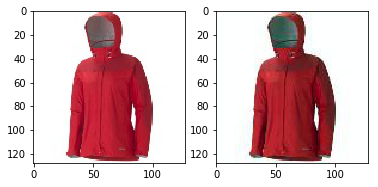

In [72]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_real)
axarr[1].imshow(img_real2)

(array([ 3209.,  7424.,  1694.,  1593.,  1590.,  1526.,  1568.,   932.,
          295., 29321.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

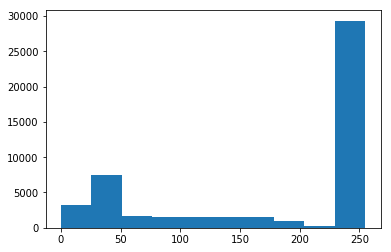

In [73]:
my_arr = np.array(img_real2)
final = []
for arr in my_arr:
    for piece in arr:
        for item in piece:
            final.append(item)
plt.hist(final)

In [74]:
print('Hi')

Hi


## Challenge 3

In [78]:
final_imgs_features = []
final_imgs_labels = []
dir_order = []

directories = os.listdir(normalized_images_dir)

for subdir in directories:
    filepaths = os.listdir(normalized_images_dir+subdir)
    for img in filepaths:
    #arr = [np.array(Image.open('normalized_imgs/{0}/'.format(subdir)+img)) for img in filepaths]
        img = np.array(Image.open(normalized_images_dir + subdir + '/' + img)).flatten()
        final_imgs_features.append(img)
        final_imgs_labels.append(subdir)
    dir_order.append(subdir)

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_imgs_features, final_imgs_labels, test_size=0.25, random_state=42)

In [ ]:
#from sklearn import svm
#clf = svm.SVC()
# Returns our classifier, which is what we used to predict
#clf.fit(x_train, y_train)
#print("...Done!")

In [ ]:
#from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
#logisticRegr = LogisticRegression()
#logisticRegr.fit(x_train, y_train)
#print("...Trained!")
#logisticRegr.predict(x_test)

In [80]:
from sklearn import datasets, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def skl_knn(k, test_data, test_target, stored_data, stored_target):
    """k: number of neighbors to use in classication
    test_data: the data/targets used to test the classifier
    stored_data: the data/targets used to classify the test_data
    """
    print('Training...')
    
    classifier = KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(stored_data, stored_target)

    y_pred = classifier.predict(test_data) 

    print(classification_report(test_target, y_pred))
    return classifier

In [81]:
knn_model = skl_knn(8, x_test, y_test, x_train, y_train)

Training...
                   precision    recall  f1-score   support

             axes       0.86      0.90      0.88        21
            boots       1.00      0.97      0.98        30
       carabiners       0.95      0.94      0.94        78
         crampons       1.00      0.67      0.80        27
           gloves       0.97      0.74      0.84        53
hardshell_jackets       0.61      0.94      0.74       121
        harnesses       1.00      0.79      0.88        42
          helmets       0.90      0.56      0.69        16
insulated_jackets       0.69      0.44      0.54        57
          pulleys       1.00      0.08      0.15        12
             rope       0.84      0.70      0.76        46
            tents       0.72      1.00      0.84        28

      avg / total       0.83      0.79      0.78       531



In [82]:
import pickle
pickle.dump(knn_model, open( "knn_model.pkl", "wb" ) )

In [83]:
to_pickle = [x_test, y_test, x_train, y_train]
names = ["x_test", "y_test", "x_train", "y_train"]
for i in range(0, len(names)):
    pickle.dump(to_pickle[i], open( "{0}.pkl".format(names[i]), "wb" ) )
    
pickle.dump(final_imgs_features, open( "features.pkl", "wb" ) )
pickle.dump(final_imgs_labels, open( "labels.pkl", "wb" ) )

In [84]:
!curl -O https://shop.epictv.com/sites/default/files/ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  167k  100  167k    0     0   134k      0  0:00:01  0:00:01 --:--:--  134k


## Challenge 4

In [85]:
import pickle
import numpy as np
def get_pkl(filename):
    with open(filename, 'rb') as f:
        return np.array(pickle.load(f))

### Load Pickle files
- `features` = All features
- `labels` = All labels
- `x_train` = Training features
- `y_train` = Training labels
- `x_test` = Test features
- `y_test` = Test labels

In [86]:
features = get_pkl('images_features.pkl')
labels = get_pkl('images_labels.pkl')

print('Feature shape:', features.shape)
print('Label shape:', labels.shape)

Feature shape: (2122, 128, 128, 3)
Label shape: (2122,)


In [88]:
features_update = np.array(features) / 255
features = features_update

### Get Validation Set
- From `x_train` and `y_train`, get 25% of the data as a validation set
- Will **still** be training on `x_train` and `y_train`

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)
new_x_train, x_validate, new_y_train, y_validate = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [90]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def OneHotCoder(val_arr):
    data = val_arr
    values = array(data)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

In [91]:
y_train_encoded = OneHotCoder(y_train)
y_test_encoded = OneHotCoder(y_test)

In [95]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128,128,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(set(y_train)), activation='softmax'))
     
    return model

In [93]:
model1 = createModel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
__________

In [96]:
batch_size = 64
epochs = 10
model1.compile(loss=keras.losses.binary_crossentropy,
              optimizer="adam",metrics=['accuracy'])
history = model1.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs)

Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor with shape[64,128,128,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_1/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_conv2d_1_input_0_0/_151, conv2d_1/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics/acc/Mean_1/_201 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1387_metrics/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'conv2d_1/convolution', defined at:
  File "/anaconda/envs/py35/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda/envs/py35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-93-1dd2fcd4aaf6>", line 1, in <module>
    model1 = createModel()
  File "<ipython-input-92-99ed73797735>", line 6, in createModel
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128,128,3)))
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/models.py", line 467, in add
    layer(x)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/topology.py", line 617, in __call__
    output = self.call(inputs, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/convolutional.py", line 168, in call
    dilation_rate=self.dilation_rate)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 3332, in conv2d
    data_format=tf_data_format)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 781, in convolution
    return op(input, filter)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 869, in __call__
    return self.conv_op(inp, filter)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 521, in __call__
    return self.call(inp, filter)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 205, in __call__
    name=self.name)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 631, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[64,128,128,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_1/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_conv2d_1_input_0_0/_151, conv2d_1/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics/acc/Mean_1/_201 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1387_metrics/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [ ]:
results = model1.evaluate(x_test, y_test_encoded, batch_size=batch_size)
results # [Loss, Accuracy]

In [ ]:
from keras.models import save_model
save_model(model1, "vision-model.h5")